This notebook will be used for the Coursera Capstone Project

In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


Importing the CSV

In [18]:
import pandas as pd
import numpy as np

In [7]:
# The code was removed by Watson Studio for sharing.

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Total number of columns

In [8]:
COL0.shape

(194673, 38)

In [9]:
Roadcond = pd.DataFrame(COL0['ROADCOND'])

Number of empty cells in column roadcond

In [10]:
Roadcond.isnull().sum()

ROADCOND    5012
dtype: int64

In [13]:
Roadcond2 = pd.DataFrame(COL0['ROADCOND'],COL0['SEVERITYCODE'])
Roadcond2.head()

,ROADCOND
SEVERITYCODE,
2,Dry
1,Wet
1,Wet
1,Wet
2,Dry


NameError: name 'girls_grades' is not defined

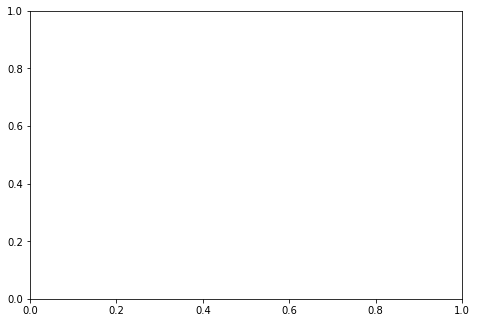

In [17]:
import matplotlib.pyplot as plt
